## Our probabilistic graph method to perform node classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
import pickle
import sys
import os
import time

In [2]:
# importar el modelo
sys.path.append(os.path.abspath(".."))
from model import probabilistic_graph_model 

In [3]:
# carpeta donde se toman los datos
carpeta_datos = ".\\Data\\"

# carpeta donde se guardan los parametros
parameters_path = ".\\Model\\"

# archivo donde se ponen los hyperparameters
hyperparameters_file = ".\\Model\\hyperparameters.csv"

# archivo de predicciones
results_file = ".\\Predictions\\"

## Cargar datos

In [4]:
# cargar el grafo
with open(carpeta_datos + "graph_nx.json", 'rb') as f:
    graph = pickle.load(f)
    
num_nodos = graph.number_of_nodes()
num_aristas = graph.number_of_edges()

print(f"Se tienen {num_nodos} nodos")
print(f"Se tienen {num_aristas} aristas")

Se tienen 169343 nodos
Se tienen 1166243 aristas


In [5]:
# ver que se tiene
graph.nodes()[6974]

{'label': 26,
 'division': 'val',
 'title': 'deep neural networks for optimal team composition',
 'abstract': "Cooperation is a fundamental social mechanism, whose effects on human performance have been investigated in several environments. Online games are modern-days natural settings in which cooperation strongly affects human behavior. Every day, millions of players connect and play together in team-based games: the patterns of cooperation can either foster or hinder individual skill learning and performance. This work has three goals: (i) identifying teammates' influence on players' performance in the short and long term, (ii) designing a computational framework to recommend teammates to improve players' performance, and (iii) setting to demonstrate that such improvements can be predicted via deep learning. We leverage a large dataset from Dota 2, a popular Multiplayer Online Battle Arena game. We generate a directed co-play network, whose links' weights depict the effect of teamma

## Create model

In [6]:
# provide all information of the grapg
model = probabilistic_graph_model(graph, 
                                 name_atributes_x = 't_y_a',
                                 name_label_y = 'label',
                                 name_division = 'division')

# see model information
model.print_info()

----------------------------------------------------------------------------------------------------
Number of nodes: 169343
Number of edges: 1166243
Number of classes: 40

Training nodes:   90941 (53.70%)
Validation nodes: 29799 (17.60%)
Testing nodes:    48603 (28.70%)
Useless nodes:    0 (0.00%)
----------------------------------------------------------------------------------------------------


## In degree distribution

Analize zero discrete lognormal distribution
For the in distribution


Label: 2 (2)
Sample of size 4839

Estimated parameters:
beta = 0.336226493077082
mu = 0.7617941786079425
sigma = 1.0826420759561137
Normalization C = 1.0963812744745112

Cells:
[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 1000]]

Expecteed values in cells
[1627.         1013.09366492  647.52909606  412.12013194  274.69474786
  191.02145125  137.55636191  101.93042692   77.34331882   59.86822666
   47.13520421   37.65801607   30.47325963   24.93827758  156.63781618]
Observed values in cells
[1627, 1025, 628, 412, 279, 186, 124, 115, 82, 51, 58, 40, 40, 16, 156]


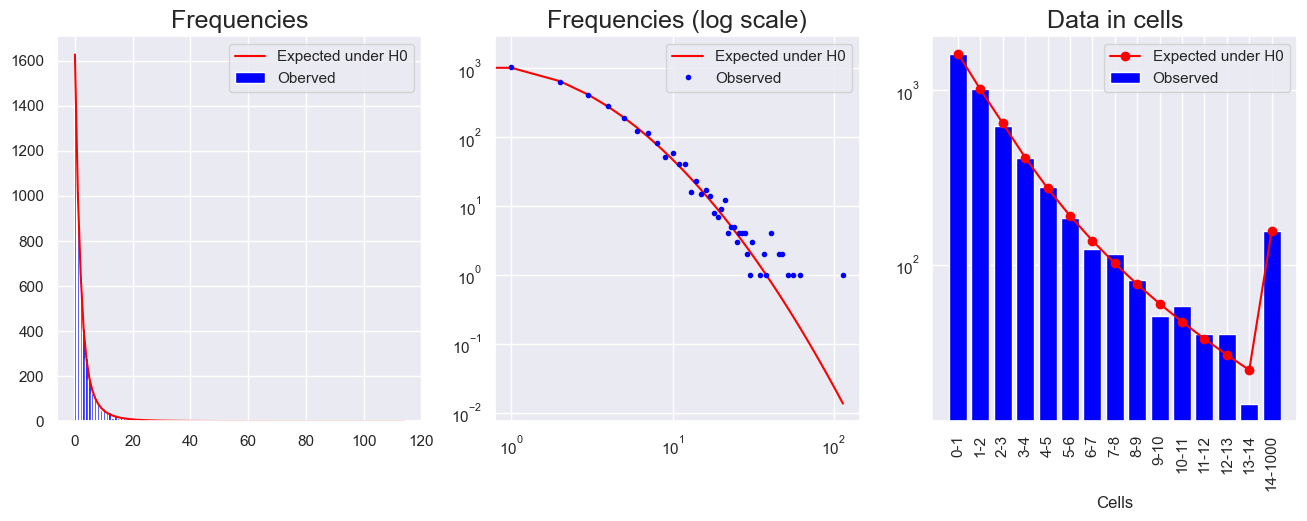


Chi square test 

Statistic T = 14.368766008221433
p-value = 0.21325545435682725
The distribution is zero discrete lognormal
----------------------------------------------------------------------------------------------------


In [7]:
# individual example
model.analize_zero_discrete_lognormal(mode = "in", 
                                      labels_check = [2],
                                      number_cells = 15,
                                      show_ind_results = True)

Analize zero discrete lognormal distribution
For the in distribution



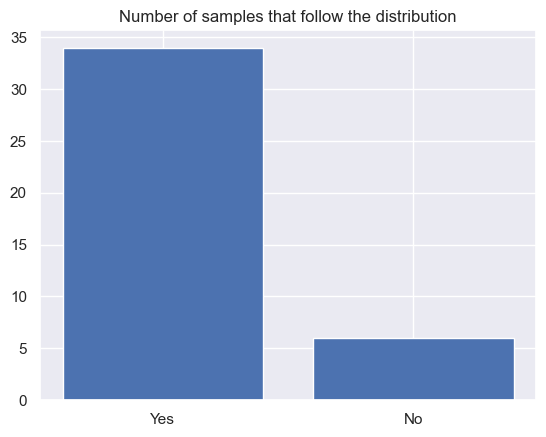


Yes : 34 (85.0)
No : 6 (15.0)

Unsuccessful labels:
Label: 7 (7)
Label: 13 (13)
Label: 16 (16)
Label: 24 (24)
Label: 30 (30)
Label: 34 (34)


In [8]:
# all samples
model.analize_zero_discrete_lognormal(mode = "in", 
                                      D_max = 1000,
                                      number_cells = 15,
                                      show_ind_results = False)

Analize zero discrete lognormal distribution
For the in distribution


Label: 30 (30)
Sample of size 11814

Estimated parameters:
beta = 0.35305569663111563
mu = 0.7414202656967284
sigma = 1.830847536646826
Normalization C = 1.2991366809131366

Cells:
[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 14], [14, 29], [29, 1000]]

Expecteed values in cells
[4171.         1993.26952    1081.42308335  707.60376346  508.3659581
  386.72013273  305.88470038  248.93963203  207.06586092  175.24219735
  150.41432219  130.62604049  215.92027986  769.65022664  761.87428251]
Observed values in cells
[4171, 1914, 1139, 770, 510, 408, 272, 236, 201, 185, 165, 122, 230, 763, 728]


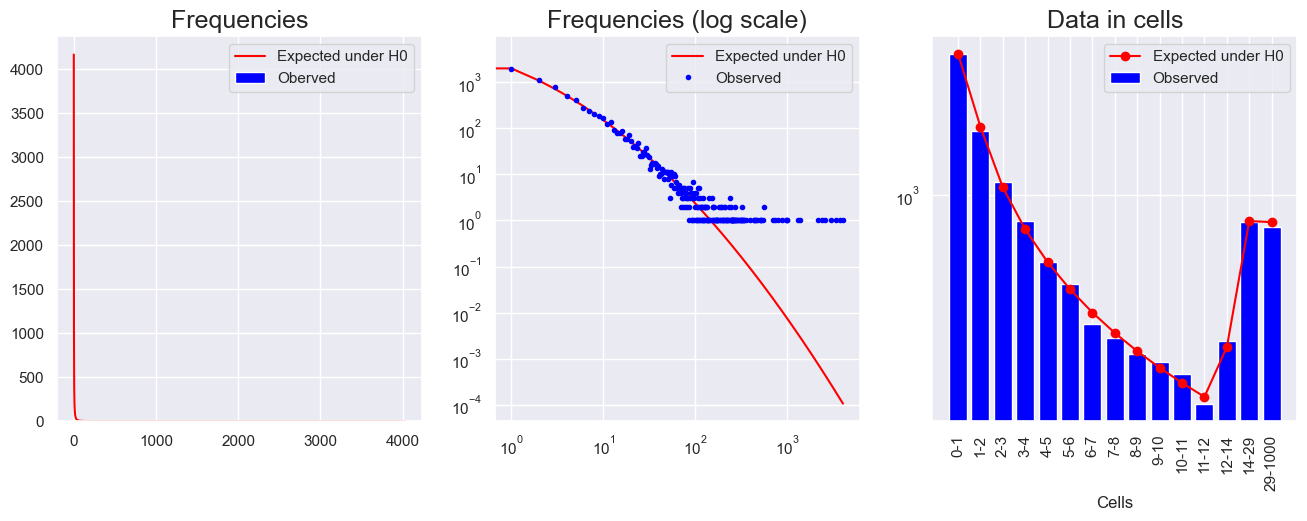


Chi square test 

Statistic T = 22.509138728496428
p-value = 0.02071261513586396
The distribution is NOT zero discrete lognormal
----------------------------------------------------------------------------------------------------


In [9]:
# see an unsuccessful example
model.analize_zero_discrete_lognormal(mode = "in", 
                                      labels_check = [30],
                                      number_cells = 15,
                                      show_ind_results = True)

## Out degree distribution

Analize zero discrete lognormal distribution
For the out distribution



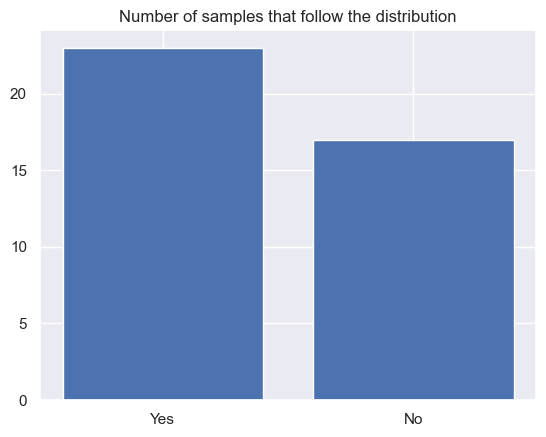


Yes : 23 (57.5)
No : 17 (42.5)

Unsuccessful labels:
Label: 2 (2)
Label: 9 (9)
Label: 12 (12)
Label: 13 (13)
Label: 16 (16)
Label: 17 (17)
Label: 24 (24)
Label: 25 (25)
Label: 26 (26)
Label: 27 (27)
Label: 28 (28)
Label: 30 (30)
Label: 31 (31)
Label: 33 (33)
Label: 34 (34)
Label: 36 (36)
Label: 38 (38)


In [10]:
# all samples
model.analize_zero_discrete_lognormal(mode = "out", 
                                      D_max = 1000,
                                      number_cells = 15,
                                      show_ind_results = False)

## Classification

Estimating parameters...
Done!

Precompute omega function
Inference iteration 0
{'f1_macro': 0.5228205143750122, 'f1_weighted': 0.7186394451474384, 'f1_micro': 0.7319037551595691}
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 1

Inference using ML


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [00:47<00:00, 1658.72it/s]


{'f1_macro': 0.5823570680534791, 'f1_weighted': 0.7500582381298871, 'f1_micro': 0.7563005469982215}

In validation nodes
Inference on interation 1 is 83% equal to the last iteration

Inference using MAP


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [00:40<00:00, 1931.12it/s]


{'f1_macro': 0.5709015525759984, 'f1_weighted': 0.7485819112114281, 'f1_micro': 0.7579113393066882}

In validation nodes
Inference on interation 1 is 84% equal to the last iteration


In validation nodes
Inference on iteration 1 yield ML and MAP predictions 97% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 2

Inference using ML


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [00:37<00:00, 2068.02it/s]


{'f1_macro': 0.5891745292459287, 'f1_weighted': 0.7516187222562357, 'f1_micro': 0.7573408503641061}

In validation nodes
Inference on interation 2 is 96% equal to the last iteration

Inference using MAP


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [00:37<00:00, 2064.29it/s]


{'f1_macro': 0.5774577431060045, 'f1_weighted': 0.7497388339186914, 'f1_micro': 0.7586496191147354}

In validation nodes
Inference on interation 2 is 96% equal to the last iteration


In validation nodes
Inference on iteration 2 yield ML and MAP predictions 97% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 3

Inference using ML


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [00:37<00:00, 2104.66it/s]


{'f1_macro': 0.587239762294609, 'f1_weighted': 0.7504914699100127, 'f1_micro': 0.7558642907480116}

In validation nodes
Inference on interation 3 is 98% equal to the last iteration

Inference using MAP


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [00:37<00:00, 2100.28it/s]


{'f1_macro': 0.5759062891048365, 'f1_weighted': 0.7494693599616258, 'f1_micro': 0.7581462465183395}

In validation nodes
Inference on interation 3 is 98% equal to the last iteration


In validation nodes
Inference on iteration 3 yield ML and MAP predictions 97% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 4

Inference using ML


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [00:37<00:00, 2112.46it/s]


{'f1_macro': 0.5866624372483227, 'f1_weighted': 0.7488018343076331, 'f1_micro': 0.7540521494009866}

In validation nodes
Inference on interation 4 is 99% equal to the last iteration

Inference using MAP


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [00:37<00:00, 2111.22it/s]


{'f1_macro': 0.5774916513370948, 'f1_weighted': 0.7487438729650461, 'f1_micro': 0.7573744085371993}

In validation nodes
Inference on interation 4 is 99% equal to the last iteration


In validation nodes
Inference on iteration 4 yield ML and MAP predictions 97% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 5

Inference using ML


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [00:39<00:00, 1981.58it/s]


{'f1_macro': 0.5858388038730389, 'f1_weighted': 0.7485905578288434, 'f1_micro': 0.75364945132387}

In validation nodes
Inference on interation 5 is 99% equal to the last iteration

Inference using MAP


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [00:38<00:00, 2025.30it/s]


{'f1_macro': 0.5748107681705973, 'f1_weighted': 0.7480883927613214, 'f1_micro': 0.756669686902245}

In validation nodes
Inference on interation 5 is 99% equal to the last iteration


In validation nodes
Inference on iteration 5 yield ML and MAP predictions 97% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 6

Inference using ML


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [00:36<00:00, 2123.77it/s]


{'f1_macro': 0.5849090620082912, 'f1_weighted': 0.7478062902697923, 'f1_micro': 0.7527098224772644}

In validation nodes
Inference on interation 6 is 99% equal to the last iteration

Inference using MAP


  0%|                                                                                        | 0/78402 [00:00<?, ?it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|██████████████████████████████████████████████████████████████████████████| 78402/78402 [00:38<00:00, 2017.50it/s]


{'f1_macro': 0.5765596422926021, 'f1_weighted': 0.7478616218521901, 'f1_micro': 0.7564012215175006}

In validation nodes
Inference on interation 6 is 99% equal to the last iteration


In validation nodes
Inference on iteration 6 yield ML and MAP predictions 96% equal

Analize statistics of results in 29799 validation nodes


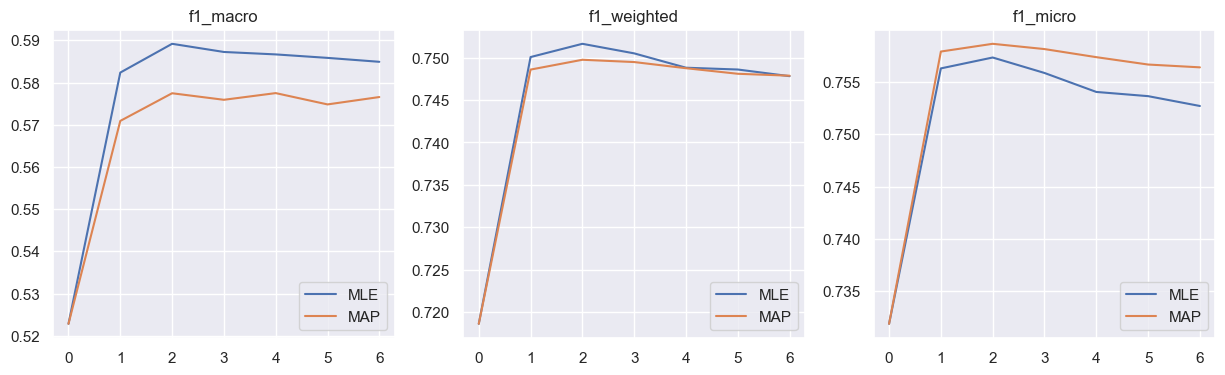

MLE achieves the best f1_micro 0.75734 in iteration 2
MAP achieves the best f1_micro 0.75865 in iteracion 2
Mejor desempeño MLE
{'f1_macro': 0.5891745292459287, 'f1_weighted': 0.7516187222562357, 'f1_micro': 0.7573408503641061}
Mejor desempeño MAP
{'f1_macro': 0.5774577431060045, 'f1_weighted': 0.7497388339186914, 'f1_micro': 0.7586496191147354}


In [11]:
# set hyperparameters
config = {
    
    "Vectorizer" : "tfidf",  # count tfidf
    "Ngram_range": (1, 2),  # (1, 1) , (1, 2)
    "Min_df": 1,
    "Max_df": 0.5,
    "Max_features": None, # None, 10000, 3000000
    "alpha_omega": 0.002,
    
    "alpha_pi" : 0,
    "alhpa_Theta": 1,
    "alpha_Xi" : 1,
    
    "D_in_max" : 10,
    "psi_dist": "zero_truncated_power_law",   # additive_smoothing, zero_truncated_power_law, zero_lognormal
    "alpha_psi": 0.1,                           # en caso de hacer additive_smoothing
    
    "D_out_max": 200,
    "phi_dist": "zero_truncated_power_law",   # additive_smoothing, zero_truncated_power_law, zero_lognormal
    "alpha_phi": 2,                            # en caso de hacer additive_smoothing
    
    "method_iteration_0": "text",            # text, random, near
    "num_iterations": 6,
    "Metric" : "f1_micro", 
}

# semilla para tener replicabilidad
seed = 42
np.random.seed(seed)

model.probabilistic_inference_complete(config,
                                       folder_parameters = parameters_path,
                                       prediction_path = results_file,
                                       hyperparameters_file = hyperparameters_file)


## Evaluate

In [12]:
# validation data
print("ML")
print(model.evaluar_iteracion_metodo(idx_iteracion = model.best_iter_mle_,
                                     metodo = "mle"))
print("\nMAP")
print(model.evaluar_iteracion_metodo(idx_iteracion = model.best_iter_map_,
                                     metodo = "map"))

ML
{'f1_macro': 0.5891745292459287, 'f1_weighted': 0.7516187222562357, 'f1_micro': 0.7573408503641061}

MAP
{'f1_macro': 0.5774577431060045, 'f1_weighted': 0.7497388339186914, 'f1_micro': 0.7586496191147354}


In [13]:
# test data
print("ML")
print(model.evaluate_test_nodes(iteration = model.best_iter_mle_,
                                method = "mle"))
print("\nMAP")
print(model.evaluate_test_nodes(iteration = model.best_iter_map_,
                                method = "map"))

ML
{'f1_macro': 0.5633090163822099, 'f1_weighted': 0.7349851406569241, 'f1_micro': 0.7403246713165854}

MAP
{'f1_macro': 0.550692386053232, 'f1_weighted': 0.7344190117393655, 'f1_micro': 0.7432668765302554}
